In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [ ]:
NUM_PLAYERS = 10000

## supply constants
T0_SUPPLY = 300
MAX_SUPPLY = 600
MIN_SUPPLY = 60
DELTA_SUPPLY = 20

## price constants
T0_PRICE = 25
MIN_PRICE = 5
DELTA_PRICE = 2
# MAX_PRICE = infinite

## purchase constants
# MAX_PURCHASES = last day's supply * 3/4
# MIN_PURCHASES = last day's supply * 1/4

<function matplotlib.pyplot.show>

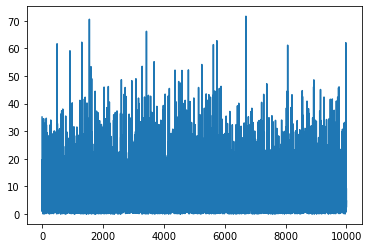

In [ ]:
thresholds = np.load("thresholds.npy")
plt.plot(thresholds)
plt.show

In [ ]:
print("Thresholds lie between " + str(min(thresholds)) + " to " + str(max(thresholds)))

Thresholds lie between 5.809122300651691e-05 to 71.67573233038755


In [ ]:
def calculate_motivations(thresholds, price_on_that_day):
  return thresholds - price_on_that_day

def pick_most_motivated_players(motivations, supply):
  if(len(motivations[motivations > 0]) >= supply):
    return (-motivations).argsort()[:supply]
  else:
    if(len(motivations[motivations > 0]) == 0):
      return []
    indices = [i for i in range(len(motivations))]
    indices = np.array(indices)
    return indices[motivations > 0]

def fcfs(motivations, supply):
  applicable_players = len(motivations[motivations > 0])

  if(applicable_players >= supply):
    indices = (-motivations).argsort()[:applicable_players]
    random.shuffle(indices)
    return indices[:supply]
  else:
    if(applicable_players == 0):
      return []
    indices = [i for i in range(len(motivations))]
    indices = np.array(indices)
    return indices[motivations > 0]

In [ ]:
def next_day_price(prev_day_price, prev_day_supply, prev_day_purchases):
  if prev_day_purchases > 3/4 * prev_day_supply:
    return prev_day_price + DELTA_PRICE
  
  elif prev_day_purchases < 1/4 * prev_day_supply:
    return max(MIN_PRICE, prev_day_price - DELTA_PRICE)

  else:
    return prev_day_price

def next_day_supply(prev_day_supply, prev_day_purchases):
  if prev_day_purchases > 3/4 * prev_day_supply:
    return min(MAX_SUPPLY, prev_day_supply + DELTA_SUPPLY)
  
  elif prev_day_purchases < 1/4 * prev_day_supply:
    return max(MIN_SUPPLY, prev_day_supply - DELTA_SUPPLY)

  else:
    return prev_day_supply

In [ ]:
## constant supply

def return_revenue(thresholds, method):
  '''
  method = fcfs or most_motivated
  '''
  if method == "fcfs":
    player_choosing = fcfs
  elif method == "most_motivated":
    player_choosing = pick_most_motivated_players

  revenues = []
  prices = []
  supplies = []
  parameters_on_a_day = {'supply': T0_SUPPLY, 'price': T0_PRICE}
  t = 0

  while(1):
    thresholds = thresholds - 0.005*t
    today_supply = parameters_on_a_day['supply']
    today_price = parameters_on_a_day['price']
    prices.append(today_price)
    supplies.append(today_supply)

    motivations = calculate_motivations(thresholds, today_price)
    who_bought = player_choosing(motivations, today_supply)
    thresholds = np.delete(thresholds, who_bought)
    
    today_purchases = len(who_bought)
    
    revenues.append(today_purchases * today_price)

    if today_purchases == 0 and today_price == MIN_PRICE:
      break

    parameters_on_a_day['supply'] = next_day_supply(today_supply, today_purchases)
    parameters_on_a_day['price'] = next_day_price(today_price, today_supply, today_purchases)
    t = t+1

  revenues = np.array(revenues)
  prices = np.array(prices)
  supplies = np.array(supplies)

  return revenues, prices, supplies

For First-come-first-serve:
Total revenue = 46249
Prices plot:


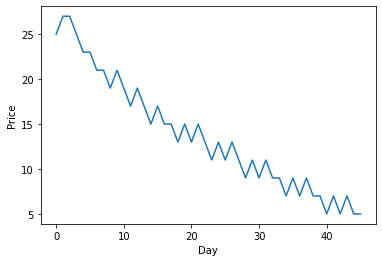

Supplies plot:


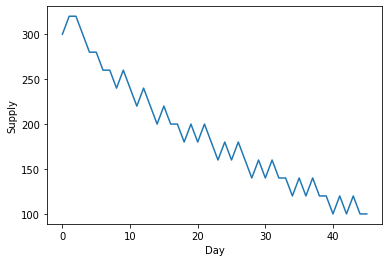

Revenue plot:


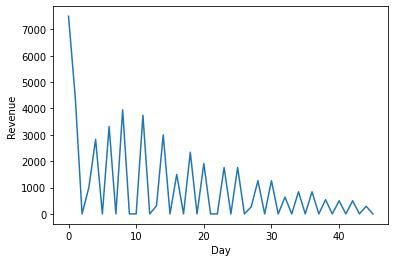

For most motivation strategy:
Total revenue = 44482
Prices plot:


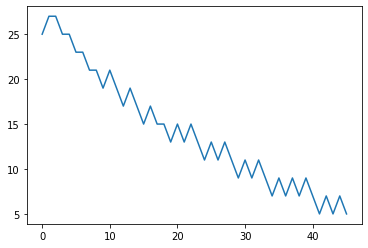

Supplies plot:


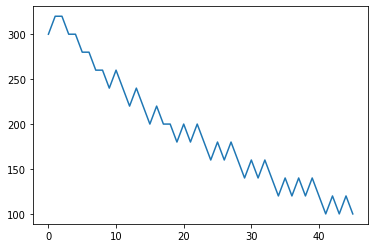

Revenue plot:


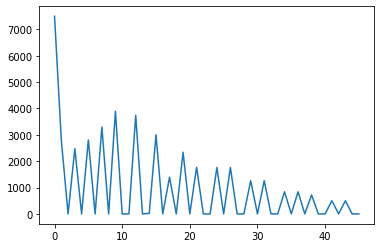

In [ ]:
### Keeping the supply constant 
thresholds_copy = np.copy(thresholds)
revenues_fcfs, prices_fcfs, supplies_fcfs = return_revenue(thresholds_copy, "fcfs") 

thresholds_copy = np.copy(thresholds)
revenues_most_motivated, prices_most_motivated, supplies_most_motivated = return_revenue(thresholds_copy, "most_motivated")

print ("For First-come-first-serve:")
print ("Total revenue = " + str(np.sum(revenues_fcfs)))
print("Prices plot:")
plt.plot(prices_fcfs)
plt.xlabel("Day")
plt.ylabel("Price")
plt.show()

print("Supplies plot:")
plt.plot(supplies_fcfs)
plt.xlabel("Day")
plt.ylabel("Supply")
plt.show()

print("Revenue plot:")
plt.plot(revenues_fcfs)
plt.xlabel("Day")
plt.ylabel("Revenue")
plt.show()

print ("For most motivation strategy:")
print ("Total revenue = " + str(np.sum(revenues_most_motivated)))
print("Prices plot:")
plt.plot(prices_most_motivated)
plt.show()


print("Supplies plot:")
plt.plot(supplies_most_motivated)
plt.show()

print("Revenue plot:")
plt.plot(revenues_most_motivated)
plt.show()

In [ ]:
thresholds = save_thresholds
print(parameters)

[{'supply': 20, 'price': 20}, {'supply': 20, 'price': 20}, {'supply': 20, 'price': 20}, {'supply': 20, 'price': 20}, {'supply': 20, 'price': 20}, {'supply': 20, 'price': 20}, {'supply': 20, 'price': 20}, {'supply': 20, 'price': 20}, {'supply': 20, 'price': 20}, {'supply': 20, 'price': 20}, {'supply': 20, 'price': 20}, {'supply': 20, 'price': 20}, {'supply': 20, 'price': 20}, {'supply': 20, 'price': 20}, {'supply': 20, 'price': 20}, {'supply': 20, 'price': 20}, {'supply': 20, 'price': 20}, {'supply': 20, 'price': 20}, {'supply': 20, 'price': 20}, {'supply': 20, 'price': 20}, {'supply': 20, 'price': 20}, {'supply': 20, 'price': 20}, {'supply': 20, 'price': 20}, {'supply': 20, 'price': 20}, {'supply': 20, 'price': 20}, {'supply': 20, 'price': 20}, {'supply': 20, 'price': 20}, {'supply': 20, 'price': 20}, {'supply': 20, 'price': 20}, {'supply': 20, 'price': 20}, {'supply': 20, 'price': 20}, {'supply': 20, 'price': 20}, {'supply': 20, 'price': 20}, {'supply': 20, 'price': 20}, {'supply': 20

In [ ]:
print(revenues)

[1900    0  945    0 1800    0 1400    0  910    0  600    0  600    0
  600    0  600    0  600    0  600    0   90  500    0  500    0  500
    0  500    0  500    0  500    0  500    0  500    0  500    0  500
    0  500    0  300    0  400    0  400    0  400    0  400    0  400
    0  400    0  400    0  400    0  400    0  400    0  400    0  400
    0  400    0  400    0  400    0  400    0  400    0  400    0  400
    0  400    0  400    0  280    0]


In [ ]:
print(T0_SUPPLY)

100


In [ ]:
# infinite supply
revenues = []

for price in range(5, 70):
  motivations = calculate_motivations(thresholds, price)
  applicable_players = len(motivations[motivations > 0])

  revenue = applicable_players * price
  print(revenue)
  revenues.append(revenue)

27240
28986
30037
30536
30618
29940
29293
28272
27053
25928
24675
23200
21794
20412
19247
17800
16632
15400
14444
13392
12625
11804
10908
10164
9309
8400
7471
6880
6138
5406
4690
4284
3996
3572
3354
3280
2829
2646
2021
1804
1665
1334
1175
1104
931
850
867
884
742
648
605
560
570
580
590
540
549
372
189
192
195
198
134
136
138


In [ ]:
print(len(revenues))

70


In [ ]:
print(max(thresholds))

71.67573233038755
